<a href="https://colab.research.google.com/github/lrssv/TimeSeriesForecastingCOVID19/blob/master/Stationarity_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas.plotting import autocorrelation_plot

In [0]:
#reading the dataset
url = '/content/drive/My Drive/who dataset/up_dataset_who.csv'

train = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)
train.head()

date_epicrv
2020-01-11 00:00:00+00:00    41
2020-01-12 00:00:00+00:00     0
2020-01-13 00:00:00+00:00     1
2020-01-14 00:00:00+00:00     1
2020-01-15 00:00:00+00:00     0
Name: 0, dtype: int64

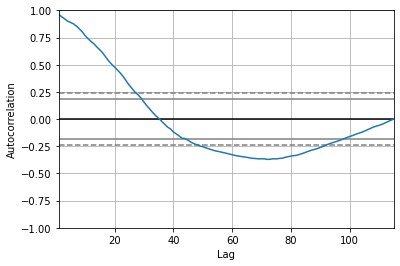

In [0]:

autocorrelation_plot(train)
pyplot.show()

## ADF test

In [0]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train['0'])

"The test statistic > critical value, implies that the series is not stationary"

## KPSS test

In [0]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(train['0'])

"The test statistic > critical value, implies that the series is not stationary"

## Making a Time Series Stationary



###Differencing

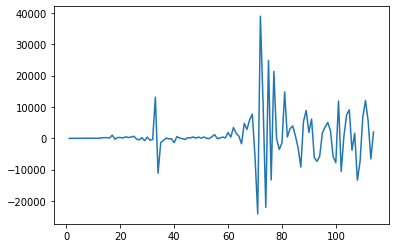

In [0]:
train['0_diff'] = train['0'] - train['0'].shift(1)
train['0_diff'].dropna().plot()

###Seasonal Differencing

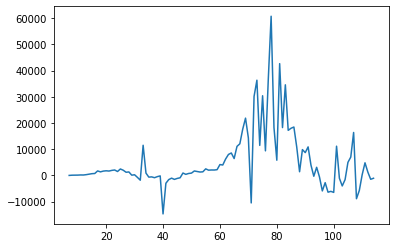

In [0]:
n=7
train['0_diff'] = train['0'] - train['0'].shift(n)
train['0_diff'].dropna().plot()

###Transformation

0           NaN
1          -inf
2           inf
3      0.000000
4          -inf
         ...   
110    0.095336
111    0.152997
112    0.063173
113   -0.075160
114    0.023832
Name: 0_log_diff, Length: 115, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


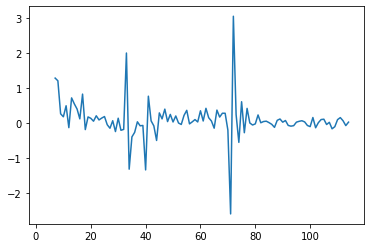

In [0]:
train['0_log'] = np.log(train['0'])
train['0_log_diff'] = train['0_log'] - train['0_log'].shift(1)
train['0_log_diff'].plot()
print(train['0_log_diff'])